# Ejercicios de la clase 3



En la siguiente tarea se propone desarrollar un enfoque similar al visto en el nb clase-3-vf-postclase.ipynb en la sección final, en donde ya se trabaja con la nomenclatura de Inteligencia Artificial. 

<font size=5 color='cornflowerblue'>
    
  **Ejercicio 1: Generación de muestras y división 90% - 10%**

<font size=4, color = "black">
1. Genera un conjunto de 5000 muestras $(x_i, y_i)$ (tiempo y distancia) usando una pendiente $\beta = 15$ y una desviación $desv = 5$. Grafica las muestras.
    
2. Grafica el histograma para X y Y.


3. Divide el conjunto de muestras en $90$% y $10$% (train y test respectivamente). Y grafica las muestras para cada conjunto.
 
Puedes apoyarte de la función "generador_datos_simple(beta, m, desviacion)" del notebook "clase-3-vf-postclase.ipynb".

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [4]:
def generador_datos_simple(beta, m, desviacion):
    
    np.random.seed(10)                      # se fija para que los valores sean reproducibles
    x = np.random.random(m) * 10           # x es arreglo con m numeros aleatorios entre 0 y 100
    e = np.random.randn(m) * desviacion    # e es un error generado aleatoriamente
    y = x * beta + e                       # se obtienen los valores de y 
                                           # x*beta genera una recta, sumando los errores, e, se alejan los puntos de la recta.     
    return x.reshape((m,1)), y.reshape((m,1))

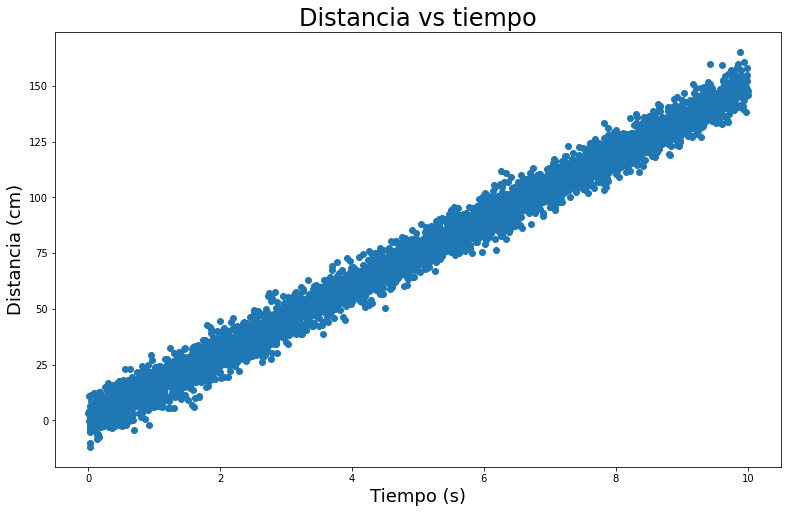

In [5]:
desviacion = 5
beta = 15
m = 5000   # numero de muestras

x,y= generador_datos_simple(beta, m, desviacion)
plt.figure(figsize=(13,8))
plt.scatter(x, y)
plt.grid(False)
plt.title('Distancia vs tiempo', size=24)
plt.xlabel('Tiempo (s)', size=18)
plt.ylabel('Distancia (cm)', size=18);

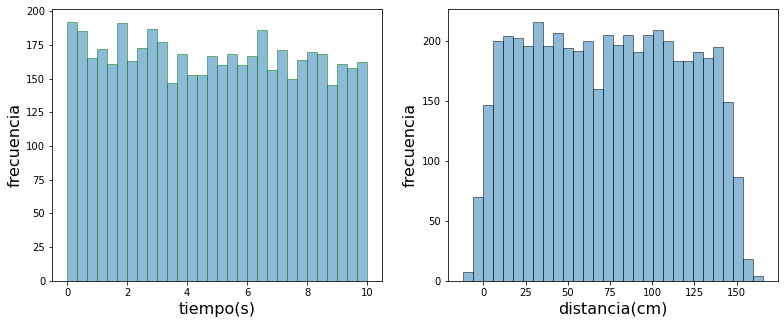

In [6]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)
plt.hist(x, bins=30, edgecolor='green', alpha=0.5)
plt.xlabel('tiempo(s)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16)

plt.subplot(1, 2, 2)
plt.hist(y, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('distancia(cm)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16);

Se tienen 5000 muestras en total
Se van a usar 4500 muestras para el ajuste
Se van a usar 500 muestras para probar


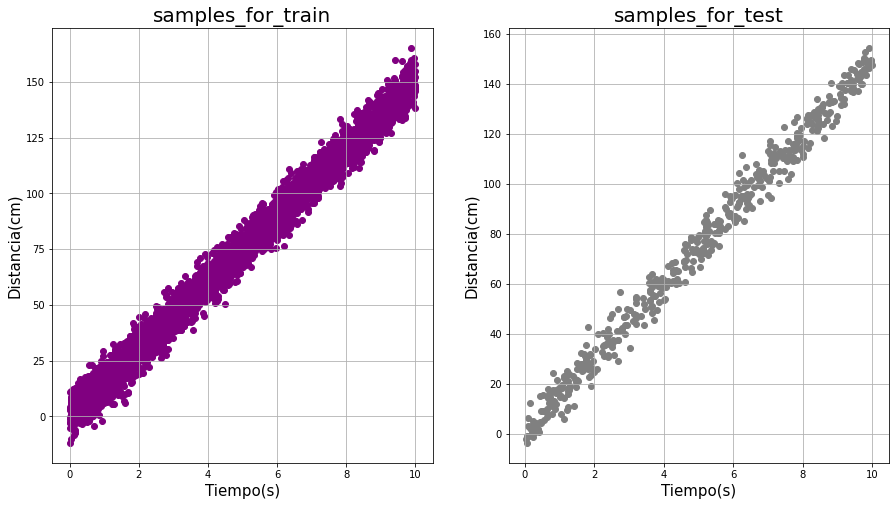

In [7]:


from random import shuffle

c = list(zip(x, y))    # se juntan las muestras: x e y ---> (x,y)
shuffle(c)             # se cambia el orden de las muestras (x,y)
(x, y) = zip(*c)       # se separan las muestras: (x,y)---> x e y

print('Se tienen', len(x), 'muestras en total')

#2. Los datos se dividen

samples_for_train = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
print('Se van a usar', len(samples_for_train[0]), 'muestras para el ajuste')

samples_for_test = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])
print('Se van a usar', len(samples_for_test[0]), 'muestras para probar')

#3. Se grafican ambos conjuntos

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.grid(True)
plt.scatter(samples_for_train[0], samples_for_train[1], color = "purple")
plt.title('samples_for_train', size=20)
plt.xlabel('Tiempo(s)', size =15)
plt.ylabel('Distancia(cm)', size =15)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.scatter(samples_for_test[0], samples_for_test[1], color='gray')
plt.title('samples_for_test', size=20)
plt.xlabel('Tiempo(s)', size =15)
plt.ylabel('Distancia(cm)', size =15);

<font size=5 color='cornflowerblue'>
    
  **Ejercicio 2: Ajuste lineal y determinación de peso (weight) y bias óptimos**

<font size=4, color = "black">
    
    
1. Usa la función *training* del nb clase-3-vf-postclase.ipynb para separar al conjunto que contiene el 90% de las muestras en los conjuntos de entrenamiento y validación.
    
    
2. Normaliza los tres conjuntos (training, validation, test) usando el promedio y la desviación estándar calculados en el conjunto de entrenamiento. Nota que la normalizacion para los conjuntos train y validation se hace dentro de la función *training*.
    
    
3. Utilizando el conjunto de entrenamiento para realizar un ajuste empleando regresión lineal y la métrica del error mínimo cuadrado (MSE) usando el método de optimización "Descenso de gradiente".


  Nota: Recuerda que el ajuste se hace usando el conjunto de entrenamiento y para cada iteración (epoch) se calcula el residuo en el conjunto de entrenamiento y validación.


4. Grafica el costo (MSE en este caso) como función de la época (epoch) para los conjuntos train y validation.
    
    
5. Determina el residuo usando los pesos (weight) y bias óptimos encontrados en el paso 3 para el conjunto de prueba (test). 
 
 
Puedes apoyarte de la función "training" del notebook "clase-3-vf-postclase.ipynb"

In [8]:
#1. Los datos se cambian de posición aleatoriamente

from random import shuffle

c = list(zip(x, y))    # se juntan las muestras: x e y ---> (x,y)
shuffle(c)             # se cambia el orden de las muestras (x,y)
(x, y) = zip(*c)       # se separan las muestras: (x,y)---> x e y

print('Se tienen', len(x), 'muestras en total')

#2. Los datos se dividen

muestras_train = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
print('Se van a usar', len(muestras_train[0]), 'muestras para el ajuste')

muestras_test = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])
print('Se van a usar', len(muestras_test[0]), 'muestras para probar')





Se tienen 5000 muestras en total
Se van a usar 4500 muestras para el ajuste
Se van a usar 500 muestras para probar


In [9]:

def training(x_train, y_train, weight, bias, alpha, epochs, val_ratio=0.1):
    
    '''
    Esta función actualiza los parámetros (w,b) usando gradient descent
    Además separa a x e y en dos conjuntos: train y validation usando el val_ratio
    
    INPUT
        x,y: muestras
        weight: peso inicial
        bias: bias inicial
        alfa: learning rate
        epochs: int que define el numero de veces a actualizar a los parámetros
        val_ratio: porcentaje de los datos (x,y) a usar como conjunto de validación
    OUTPUT
        weights: lista con los pesos actualizados en cada iteración
        biases: lista con los bias actualizados en cada iteración
        costs: lista con los residuos actualizados en cada iteración para el conjunto de entrenamiento
        costs_val: lista con los residuos actualizados en cada iteración para el conjunto de validación'''
    
    #1. inicializacion de parametros
    
    x = np.squeeze(x_train)
    y = np.squeeze(y_train)
    
    alfa =alpha 
    costs = 0
    d_w = 0.0
    d_b = 0.0
    m = len(x)

    #2.  Especificaciones de las graficas
    
    plt.figure(figsize=(13,8)) 
    plt.title('Cost vs epoch', size=24)
    plt.xlabel('epoch', size=18)
    plt.ylabel('Cost', size=18)
    
    #3. Separación de muestras en los conjuntos train y validation
    
    train_ratio = int((1.0-val_ratio)*len(x))  
   
    samples_train = (x[0:train_ratio], y[0:train_ratio])
    samples_val = (x[train_ratio:], y[train_ratio:])
    x = samples_train[0]
    y = samples_train[1]
    x_val = samples_val[0]
    y_val = samples_val[1]
    
    #3.1 Normalización
    
    mean_x = np.mean(x)
    std_x = np.std(x)
    
    mean_y = np.mean(y)
    std_y = np.std(y)
    
    x = (x-mean_x)/std_x
    y = (y-mean_y)/std_y
    x_val = (x_val-mean_x)/std_x
    y_val = (y_val-mean_y)/std_y
    
    #4. Calculo del costo por epoca para ambos conjuntos
       
    weights = []
    biases = []
    costs = []
    costs_val = []
    
    m_train = len(x)
    m_val = len(x_val)
    
    for i in range(epochs):

        # calculo de derivadas y el residuo
        cost = 0.0
        cost_val = 0.0
        
        for j in range(m_train):

            d_w += 2*(weight*x[j] + bias- y[j])*x[j]
            d_b += 2*(weight*x[j]+bias-y[j])
            cost += (y[j]-weight*x[j]-bias)**2

        cost /= m_train
        d_w /= m_train
        d_b /= m_train
        
        #calculo del costo de las muestras de validación
        
        for j in range(m_val):
            cost_val += (y_val[j]-weight*x_val[j]-bias)**2
        cost_val /= m_val
               
       
        weights.append(weight)      # se agregan los valores calculados a las listas
        biases.append(bias)
        costs.append(cost)
        costs_val.append(cost_val)
        
        #5. Actualizacion de los parametros

        weight = weight - alpha*d_w
        bias = bias - alpha*d_b
        
        plt.grid(True)
        plt.scatter(i, cost, color='blue')
        plt.scatter(i, cost_val, color='orange')
    plt.legend(['train', 'validation'],loc=0);

    return weights, biases, costs, costs_val, mean_x, std_x, mean_y, std_y


In [10]:
x_train = muestras_train[0]
y_train = muestras_train[1]

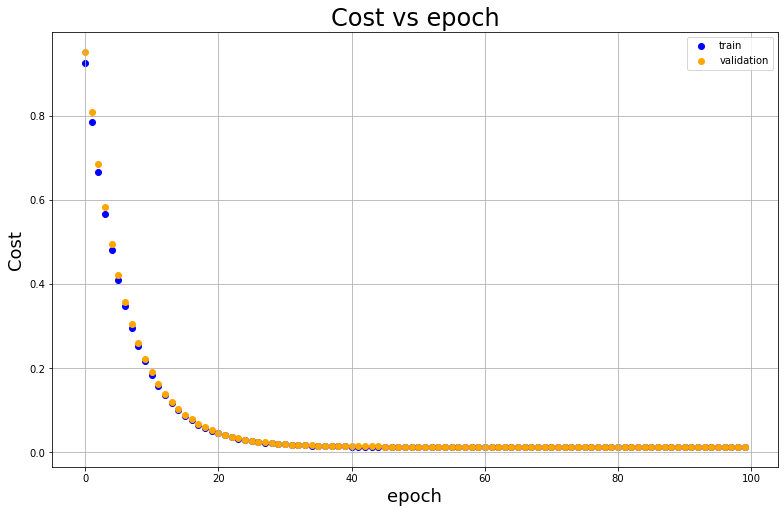

In [11]:
weight_0 = np.random.random()
bias_0 = np.random.random()
alpha = 0.04
num_epochs = 100
validation_ratio = 0.1

weights, biases, cost, cost_val, mean_x, std_x, mean_y, std_y = training \
        (x_train, y_train, weight_0, bias_0, alpha, num_epochs, validation_ratio)


<font size=5 color='cornflowerblue'>
    
  **Ejercicio 3: Inferencia**

<font size=4, color = "black">
Realiza una inferencia de la posición que tendrá una partícula para algunos de los tiempos dados en el conjunto test.

In [12]:

def inference(x, w, b, x_mean, x_std, y_mean, y_std) :
    
    x = (x-x_mean) / x_std 
    y = w * x + b
    y = y * y_std + y_mean
    
    return y



In [14]:
tiempos = [4, 8, 36, 72]

for t in tiempos :
    distancia = inference(t,weights[-1], biases[-1], mean_x, std_x, mean_y, std_y)

    print ("Para el tiempo de {0:5.3f} s la distancia inferida es {1:6.3f} cm ".format(t,distancia))

Para el tiempo de 4.000 s la distancia inferida es 60.095 cm 
Para el tiempo de 8.000 s la distancia inferida es 120.119 cm 
Para el tiempo de 36.000 s la distancia inferida es 540.290 cm 
Para el tiempo de 72.000 s la distancia inferida es 1080.511 cm 


<font size=5 color='cornflowerblue'>
    
  **Ejercicio Extra**
  
 

El ejercicio extra es opcional, pero es altamente recomendable que lo hagas.

<font size=4>
Repite el procedimineto de los ejercicio 1, 2 y 3 considerando que la depencia de Y con X está dada por: 
    $$𝐹(𝑥,𝑤,𝑏)=1.7159∗𝑡𝑎𝑛ℎ(𝑤𝑒𝑖𝑔ℎ𝑡∗𝑥+𝑏𝑖𝑎𝑠)$$

In [26]:
def generador_datos_simple(beta, m, desviacion):
    
    np.random.seed(5)                      # se fija para que los valores sean reproducibles
    x = np.random.random(m) * 10           # x es arreglo con m numeros aleatorios entre 0 y 100
    e = np.random.randn(m) * desviacion    # e es un error generado aleatoriamente
    y = 1.7159*np.tanh(x+beta+e)                 # se obtienen los valores de y 
                                           # x*beta genera una recta, sumando los errores, e, se alejan los puntos de la recta.     
    return x.reshape((m,1)), y.reshape((m,1))


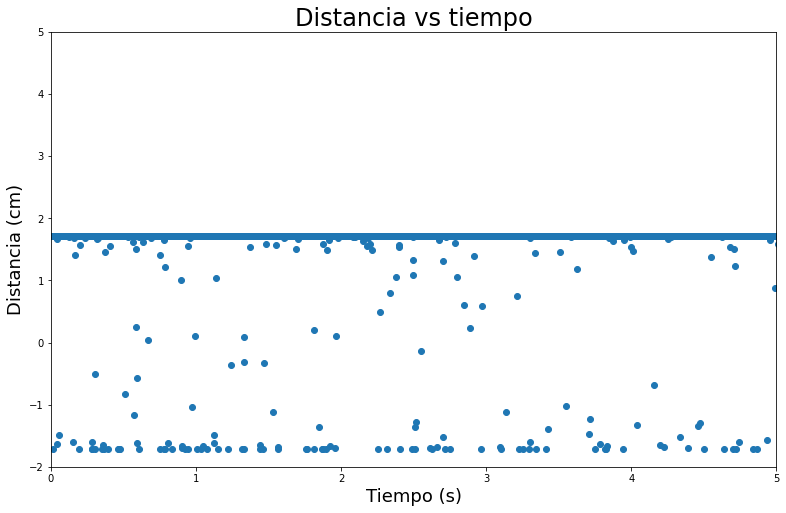

In [32]:
desviacion = 10
beta = 15
m = 5000   # numero de muestras

x,y= generador_datos_simple(beta, m, desviacion)
plt.figure(figsize=(13,8))
plt.scatter(x, y)
plt.grid(False)
plt.title('Distancia vs tiempo', size=24)
plt.xlabel('Tiempo (s)', size=18)
plt.ylabel('Distancia (cm)', size=18);

plt.xlim(0, 5);
plt.ylim(-2, 5);

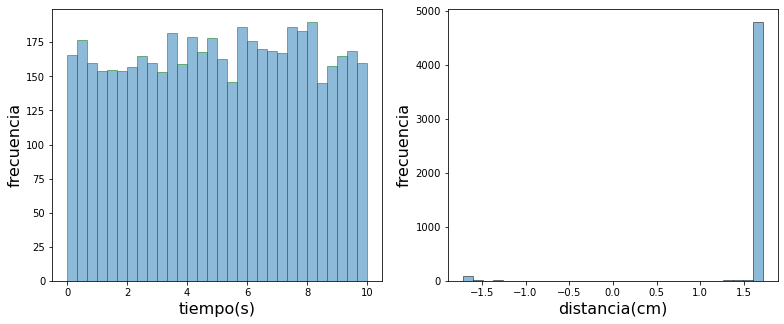

In [33]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)
plt.hist(x, bins=30, edgecolor='green', alpha=0.5)
plt.xlabel('tiempo(s)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16)

plt.subplot(1, 2, 2)
plt.hist(y, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('distancia(cm)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16);

Se tienen 5000 muestras en total
Se van a usar 4500 muestras para el ajuste
Se van a usar 500 muestras para probar


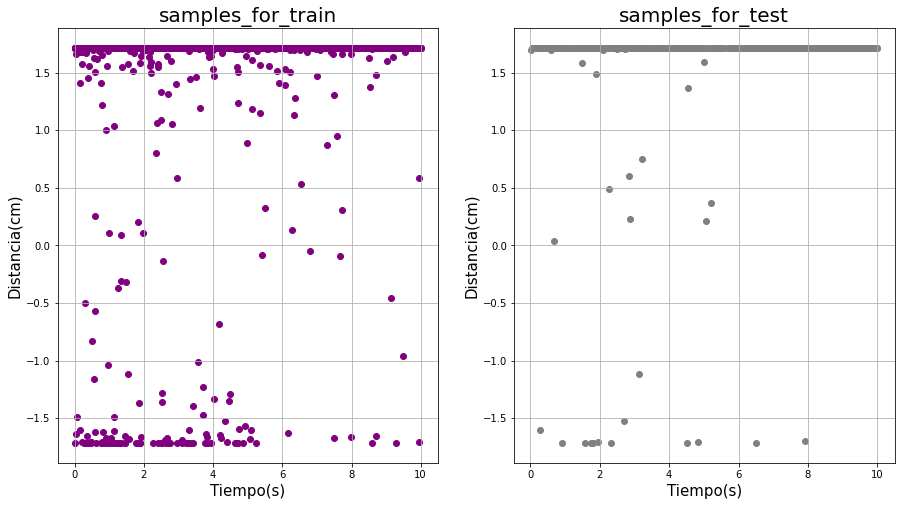

In [34]:

from random import shuffle

c = list(zip(x, y))    # se juntan las muestras: x e y ---> (x,y)
shuffle(c)             # se cambia el orden de las muestras (x,y)
(x, y) = zip(*c)       # se separan las muestras: (x,y)---> x e y

print('Se tienen', len(x), 'muestras en total')

#2. Los datos se dividen

samples_for_train = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
print('Se van a usar', len(samples_for_train[0]), 'muestras para el ajuste')

samples_for_test = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])
print('Se van a usar', len(samples_for_test[0]), 'muestras para probar')

#3. Se grafican ambos conjuntos

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.grid(True)
plt.scatter(samples_for_train[0], samples_for_train[1], color = "purple")
plt.title('samples_for_train', size=20)
plt.xlabel('Tiempo(s)', size =15)
plt.ylabel('Distancia(cm)', size =15)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.scatter(samples_for_test[0], samples_for_test[1], color='gray')
plt.title('samples_for_test', size=20)
plt.xlabel('Tiempo(s)', size =15)
plt.ylabel('Distancia(cm)', size =15);

In [35]:
#1. Los datos se cambian de posición aleatoriamente

from random import shuffle

c = list(zip(x, y))    # se juntan las muestras: x e y ---> (x,y)
shuffle(c)             # se cambia el orden de las muestras (x,y)
(x, y) = zip(*c)       # se separan las muestras: (x,y)---> x e y

print('Se tienen', len(x), 'muestras en total')

#2. Los datos se dividen

muestras_train = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
print('Se van a usar', len(muestras_train[0]), 'muestras para el ajuste')

muestras_test = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])
print('Se van a usar', len(muestras_test[0]), 'muestras para probar')





Se tienen 5000 muestras en total
Se van a usar 4500 muestras para el ajuste
Se van a usar 500 muestras para probar


In [36]:
def training(x_train, y_train, weight, bias, alpha, epochs, val_ratio=0.1):
    
    '''
    Esta función actualiza los parámetros (w,b) usando gradient descent
    Además separa a x e y en dos conjuntos: train y validation usando el val_ratio
    
    INPUT
        x,y: muestras
        weight: peso inicial
        bias: bias inicial
        alfa: learning rate
        epochs: int que define el numero de veces a actualizar a los parámetros
        val_ratio: porcentaje de los datos (x,y) a usar como conjunto de validación
    OUTPUT
        weights: lista con los pesos actualizados en cada iteración
        biases: lista con los bias actualizados en cada iteración
        costs: lista con los residuos actualizados en cada iteración para el conjunto de entrenamiento
        costs_val: lista con los residuos actualizados en cada iteración para el conjunto de validación'''
    
    #1. inicializacion de parametros
    
    x = np.squeeze(x_train)
    y = np.squeeze(y_train)
    
    alfa =alpha 
    costs = 0
    d_w = 0.0
    d_b = 0.0
    m = len(x)

    #2.  Especificaciones de las graficas
    
    plt.figure(figsize=(13,8)) 
    plt.title('Cost vs epoch', size=24)
    plt.xlabel('epoch', size=18)
    plt.ylabel('Cost', size=18)
    
    #3. Separación de muestras en los conjuntos train y validation
    
    train_ratio = int((1.0-val_ratio)*len(x))  
   
    samples_train = (x[0:train_ratio], y[0:train_ratio])
    samples_val = (x[train_ratio:], y[train_ratio:])
    x = samples_train[0]
    y = samples_train[1]
    x_val = samples_val[0]
    y_val = samples_val[1]
    
    #3.1 Normalización
    
    mean_x = np.mean(x)
    std_x = np.std(x)
    
    mean_y = np.mean(y)
    std_y = np.std(y)
    
    x = (x-mean_x)/std_x
    y = (y-mean_y)/std_y
    x_val = (x_val-mean_x)/std_x
    y_val = (y_val-mean_y)/std_y
    
    #4. Calculo del costo por epoca para ambos conjuntos
       
    weights = []
    biases = []
    costs = []
    costs_val = []
    
    m_train = len(x)
    m_val = len(x_val)
    
    for i in range(epochs):

        # calculo de derivadas y el residuo
        cost = 0.0
        cost_val = 0.0
        
        for j in range(m_train):

            d_w += 2*(weight*x[j] + bias- y[j])*x[j]
            d_b += 2*(weight*x[j]+bias-y[j])
            cost += (y[j]-weight*x[j]-bias)**2

        cost /= m_train
        d_w /= m_train
        d_b /= m_train
        
        #calculo del costo de las muestras de validación
        
        for j in range(m_val):
            cost_val += (y_val[j]-weight*x_val[j]-bias)**2
        cost_val /= m_val
               
       
        weights.append(weight)      # se agregan los valores calculados a las listas
        biases.append(bias)
        costs.append(cost)
        costs_val.append(cost_val)
        
        #5. Actualizacion de los parametros

        weight = weight - alpha*d_w
        bias = bias - alpha*d_b
        
        plt.grid(True)
        plt.scatter(i, cost, color='blue')
        plt.scatter(i, cost_val, color='orange')
    plt.legend(['train', 'validation'],loc=0);

    return weights, biases, costs, costs_val, mean_x, std_x, mean_y, std_y


In [37]:
x_train = muestras_train[0]
y_train = muestras_train[1]

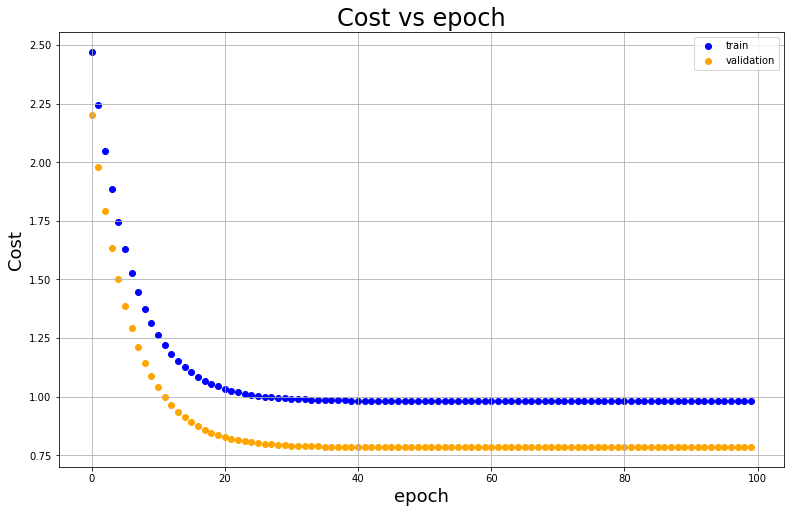

In [39]:
weight_0 = np.random.random()
bias_0 = np.random.random()
alpha = 0.04
num_epochs = 100
validation_ratio = 0.1

weights, biases, cost, cost_val, mean_x, std_x, mean_y, std_y = training \
        (x_train, y_train, weight_0, bias_0, alpha, num_epochs, validation_ratio)

In [40]:

def inference(x, w, b, x_mean, x_std, y_mean, y_std) :
    
    x = (x-x_mean) / x_std 
    y = w * x + b
    y = y * y_std + y_mean
    
    return y


In [41]:
tiempos = [4, 8, 36, 72]

for t in tiempos :
    distancia = inference(t,weights[-1], biases[-1], mean_x, std_x, mean_y, std_y)

    print ("Para el tiempo de {0:5.3f} s la distancia inferida es {1:6.3f} cm ".format(t,distancia))

Para el tiempo de 4.000 s la distancia inferida es  1.591 cm 
Para el tiempo de 8.000 s la distancia inferida es  1.694 cm 
Para el tiempo de 36.000 s la distancia inferida es  2.417 cm 
Para el tiempo de 72.000 s la distancia inferida es  3.346 cm 
